In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join('data','mouse_drug_data.csv')
clinical_trial_data_to_load = os.path.join('data','clinicaltrial_data.csv')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_merged = pd.merge(mouse_drug_data,clinical_trial_data,how='outer')

# Display the data table for preview
mouse_clinical_merged.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = mouse_clinical_merged.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'mean'})

# Function for preparing dataframes for plotting
def plot_ready(df):
    df = df.unstack('Drug') # Converts drug index into columns
    df.columns = df.columns.get_level_values(1) # Remove top header (level 0)
    df = df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']] # Pull specific drug columns
    return df

# Prepare dataframe for plotting and preview
mean_tumor = plot_ready(mean_tumor)
mean_tumor

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [3]:
# Store standard error values grouped by drug and timepoint
errors_tumor = mouse_clinical_merged.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'sem'})

# Prepare dataframe for plotting and preview
errors_tumor = plot_ready(errors_tumor)
errors_tumor

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


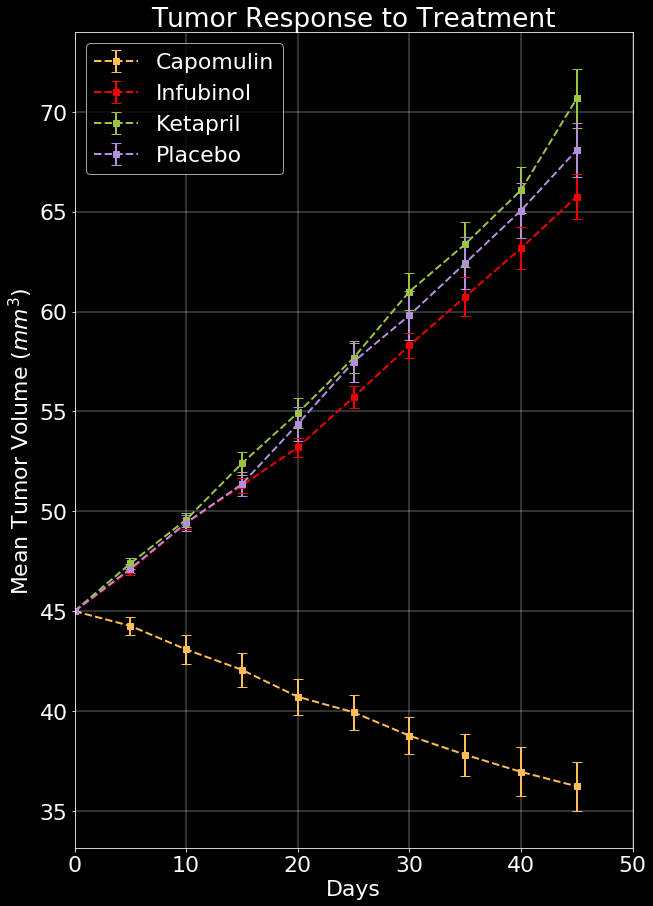

In [4]:
# Generate the Plot (with Error Bars)

# Set style for plots
plt.style.use('dark_background')

# Font size
matplotlib.rcParams.update({'font.size': 22})

# Create figure and define ax plot
fig, ax = plt.subplots(figsize=(10,15))

# Plot colors
colors = ['#ffbc57', '#f00000','#9cc341','#b48fdc']
colors_number = 0

# Loop through each column in mean_tumor and plot error bars
for column in mean_tumor:
    ax.errorbar(
        mean_tumor.index, 
        mean_tumor[column], 
        yerr=errors_tumor[column], 
        fmt='--s',
        color=colors[colors_number],
        label=column,
        linewidth=2,
        elinewidth=2,
        capsize=5
        )
    colors_number += 1

# Format
ax.set_xlim(0, 50)
ax.title.set_text("Tumor Response to Treatment")
ax.set_xlabel("Days")
ax.set_ylabel("Mean Tumor Volume ($mm^3$)")
ax.grid(linewidth=0.4)
ax.legend(loc='best')

# Save Figure
fig.savefig('Tumor_Response_to_Treatment.jpeg', dpi=300)

## Metastatic Response to Treatment

In [5]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_response = mouse_clinical_merged.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':'mean'})

# Prepare dataframe for plotting and preview
mean_response = plot_ready(mean_response)
mean_response

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [6]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
errors_response = mouse_clinical_merged.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':'sem'})

# Prepare dataframe for plotting and preview
errors_response = plot_ready(errors_response)
errors_response

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


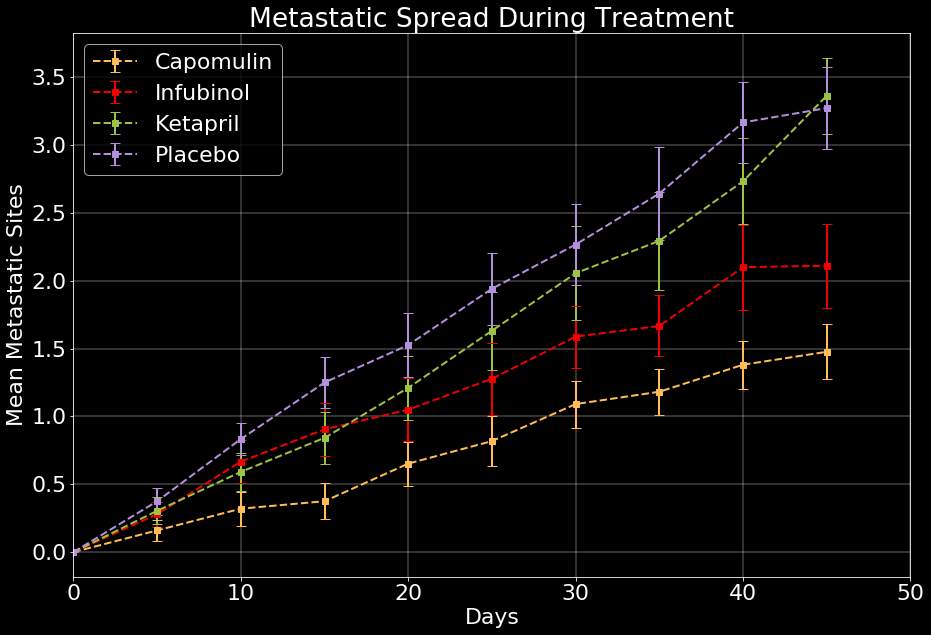

In [7]:
# Generate the Plot (with Error Bars)

# Create figure and define ax plot
fig, ax2 = plt.subplots(figsize=(15,10))

# Plot colors
colors = ['#ffbc57', '#f00000','#9cc341','#b48fdc']
colors_number = 0

# Loop through each column in mean_tumor and plot error bars
for column in mean_response:
    ax2.errorbar(
        mean_response.index, 
        mean_response[column], 
        yerr=errors_response[column], 
        fmt='--s',
        color=colors[colors_number],
        label=column,
        linewidth=2,
        elinewidth=2,
        capsize=5
        )
    colors_number += 1

# Format
ax2.set_xlim(0, 50)
ax2.title.set_text("Metastatic Spread During Treatment")
ax2.set_xlabel("Days")
ax2.set_ylabel("Mean Metastatic Sites")
ax2.grid(linewidth=0.4)
ax2.legend(loc='best')

# Save Figure
fig.savefig('Metastatic_Spread_During_Treatment.jpeg', dpi=300)


## Survival Rates

In [8]:
# Store the Count of Mice Grouped by Drug and Timepoint, columns converted to drugs, convert to %
count_survival = mouse_clinical_merged.groupby(['Drug','Timepoint']).agg({'Mouse ID':'count'})

# Prepare dataframe for plotting and preview
count_survival = plot_ready(count_survival)

# Convert to % survival rate and preview
count_survival = count_survival.divide(25).multiply(100)
count_survival

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


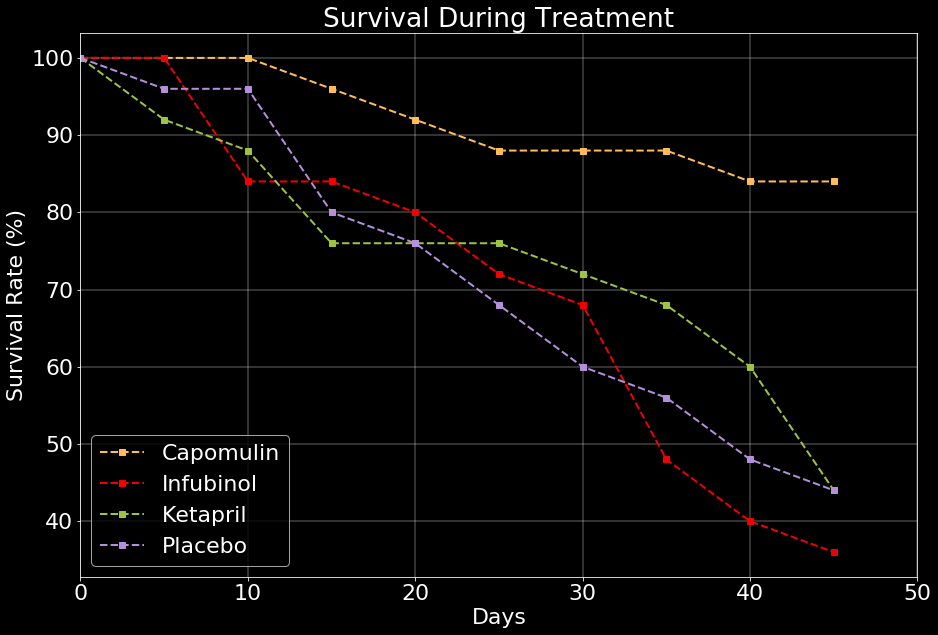

In [9]:
# Generate the Plot (Accounting for percentages)

# Create figure and define ax plot
fig, ax3 = plt.subplots(figsize=(15,10))

# Plot colors
colors = ['#ffbc57', '#f00000','#9cc341','#b48fdc']
colors_number = 0

# Loop through each column in mean_tumor and plot error bars
for column in count_survival:
    ax3.errorbar(
        count_survival.index, 
        count_survival[column], 
        fmt='--s',
        color=colors[colors_number],
        label=column,
        linewidth=2,
        elinewidth=2,
        capsize=5
        )
    colors_number += 1

# Format
ax3.set_xlim(0, 50)
ax3.title.set_text("Survival During Treatment")
ax3.set_xlabel("Days")
ax3.set_ylabel("Survival Rate (%)")
ax3.grid(linewidth=0.4)
ax3.legend(loc='best')

# Save Figure
fig.savefig('Survival_During_Treatment.jpeg', dpi=300)

## Summary Bar Graph

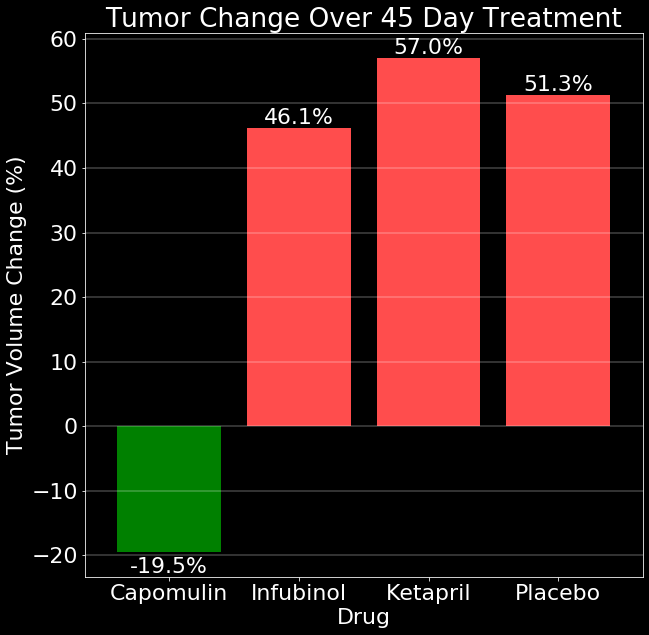

In [10]:
# Calculate the percent changes for each drug
percent_change = ((mean_tumor.unstack().groupby('Drug').last() / mean_tumor.unstack().groupby('Drug').first()) - 1) * 100

# Conditional bar colors, green = negative growth, red = positive growth 
bar_colors = []
for value in percent_change:
    if value > 0:
        bar_colors.append('#ff4d4d')
    else:
        bar_colors.append('g')

# Create plot
ax4 = percent_change.plot(kind='bar', colors=bar_colors, width=0.8, figsize=(10,10))

# Format
ax4.title.set_text("Tumor Change Over 45 Day Treatment")
ax4.set_xlabel("Drug")
ax4.set_ylabel("Tumor Volume Change (%)")
ax4.grid(axis='y',linewidth=0.4)
plt.xticks(rotation=0)

# Add labels to bars
labels = []
for value in percent_change: # Pull values from percent_change series and round
    labels.append(round(value, 1))

for rect, label in zip(ax4.patches, labels): # Loops through list of rectangle dimensions and labels list
    height = rect.get_height() # Get the height from each ax4.patches entry
    if label > 0: 
        ax4.text(rect.get_x() + rect.get_width() / 2, height, f'{label}%', ha='center', va='bottom') # Centers the text, finds height to place the text, label to apply, horizontal alignment, vertical alignment
    else:
        ax4.text(rect.get_x() + rect.get_width() / 2, height*1.04, f'{label}%', ha='center', va='top')

# Save Figure
plt.savefig('Tumor_Change_Over_Time.jpeg', dpi=300)